# Preprocessing 

In [1]:
# import relevant packages 
from src.data.preprocess_utils import read_ns5_file, filter 
from src.data.create_simulated_data import SimulateData
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
from scipy.signal import wiener  
import seaborn as sns
import numpy as np 
import pickle 
import os 

rcParams = {
    "font.family": "serif",  # use serif/main font for text elements
    'text.usetex': True,
    'font.size': 8,
    'axes.labelsize': 7,
    'axes.titlesize': 9,
    'xtick.labelsize': 6,
    'ytick.labelsize': 6,
    'legend.fontsize': 7,
    'axes.labelpad': 1,
    'axes.axisbelow': True,  # draw gridlines below other elements
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        r"\usepackage{url}",            # load additional packages
        r"\usepackage{amsmath,amssymb}",   # unicode math setup
        #  r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
}
plt.rcParams.update(rcParams)

figdir = "../../../figures/methods/"
def savefig(fig, name, width=6, height=4, format = "pdf"):
    # apply rcParams
    fig.set_size_inches(width, height)
    dpi = 1000 if format == "png" else 'figure'
    fig.savefig(figdir + name + "." + format, bbox_inches='tight', dpi = dpi)




### Illustration of Preprocessing 

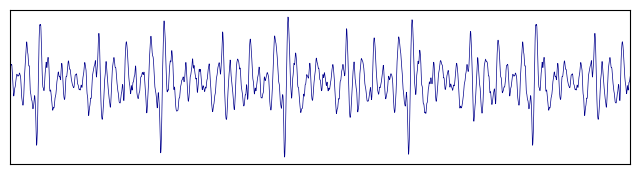

In [75]:
path = "../data/noise_files_sim_data/pli.npy"
data = np.load(path)

fig = plt.figure(figsize = (8, 2))
plt.plot(data, color = "darkblue", linewidth = 0.5)
plt.xlim([0, 3000])
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "preproces_off_center", width=2, height=2 * 0.45, format = "png")

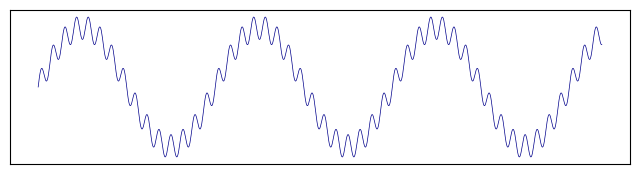

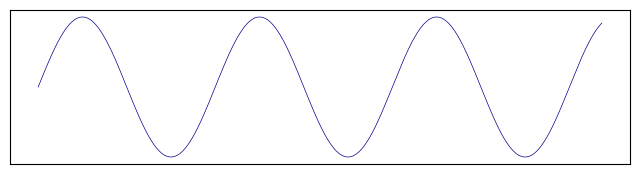

In [77]:
x = np.linspace(0, 10, 1000)
signal_pre = np.sin(2*x) + 0.2*np.sin(30*x)
signal_post = np.sin(2*x)

fig = plt.figure(figsize = (8, 2))
plt.plot(signal_pre, color = "darkblue", linewidth = 0.5)
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "preproces_lowpass_pre", width=2, height=2 * 0.45, format = "png")

fig = plt.figure(figsize = (8, 2))
plt.plot(signal_post, color = "darkblue", linewidth = 0.5)
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "preproces_lowpass_post", width=2, height=2 * 0.45, format = "png")

freq = np.linspace(0, 2, 500)
# response = np.piecewise(freq, [freq <= 1, freq > 1], [1, lambda x: 1 - (x - 1)])
response = 1 / (1 + np.exp(10 * (freq - 1)))

# fig = plt.figure(figsize = (8, 2))
# plt.plot(freq, response, color = "darkblue", linewidth = 0.5)
# plt.xticks([])
# plt.yticks([])
# plt.show()

# savefig(fig, "preproces_lowpass_filter", width=2, height=2 * 0.45, format = "png")

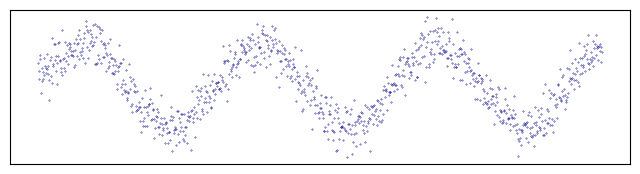

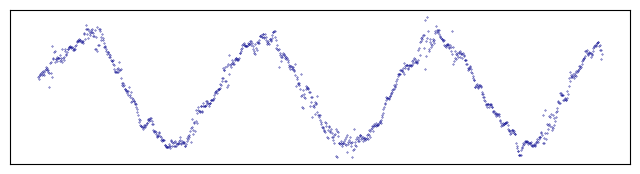

In [78]:
x = np.linspace(0, 10, 1000)
np.random.seed(0)
signal_pre = np.sin(2*x) + np.random.normal(0, 0.3, 1000)
signal_post = wiener(signal_pre, mysize=10)

fig = plt.figure(figsize = (8, 2))
plt.plot(signal_pre, '.', color = "darkblue", markersize = 0.6)
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "preproces_smooth_pre", width=2, height=2 * 0.45, format = "png")

fig = plt.figure(figsize = (8, 2))
plt.plot(signal_post, '.', color = "darkblue", markersize = 0.6)
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "preproces_smooth_post", width=2, height=2 * 0.45, format = "png")



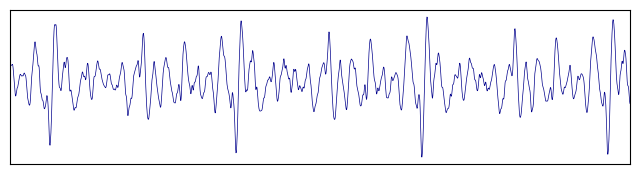

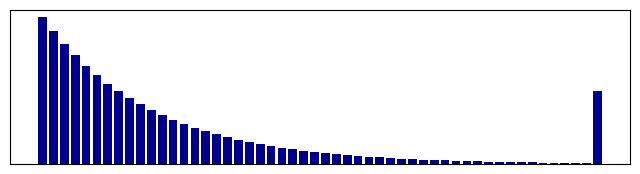

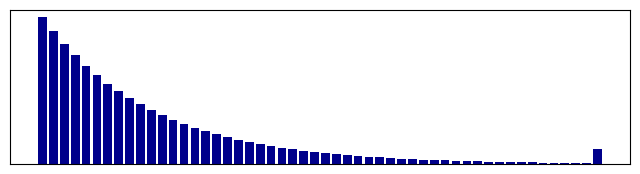

In [79]:
pli = np.load("../data/noise_files_sim_data/pli.npy")

fig = plt.figure(figsize = (8, 2))
plt.plot(pli, color = "darkblue", linewidth = 0.5)
plt.xlim([0, 2000])
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "preproces_pli", width=2, height=2 * 0.45, format = "png")

acfs = np.exp(-np.arange(52) / 10)
acfs[51] = 0.5

fig = plt.figure(figsize = (8, 2))
plt.bar(np.arange(52), acfs, color = "darkblue", linewidth = 0.5)
plt.xticks([])
plt.yticks([])
plt.show()

savefig(fig, "preproces_acfs_pre", width=2, height=2 * 0.45, format = "png")

acfs = np.exp(-np.arange(52) / 10)
acfs[51] = 0.1

fig = plt.figure(figsize = (8, 2))
plt.bar(np.arange(52), acfs, color = "darkblue", linewidth = 0.5)
plt.xticks([])
plt.yticks([])
plt.show()
savefig(fig, "preproces_acfs_post", width=2, height=2 * 0.45, format = "png")

### Result of Preprocessing 

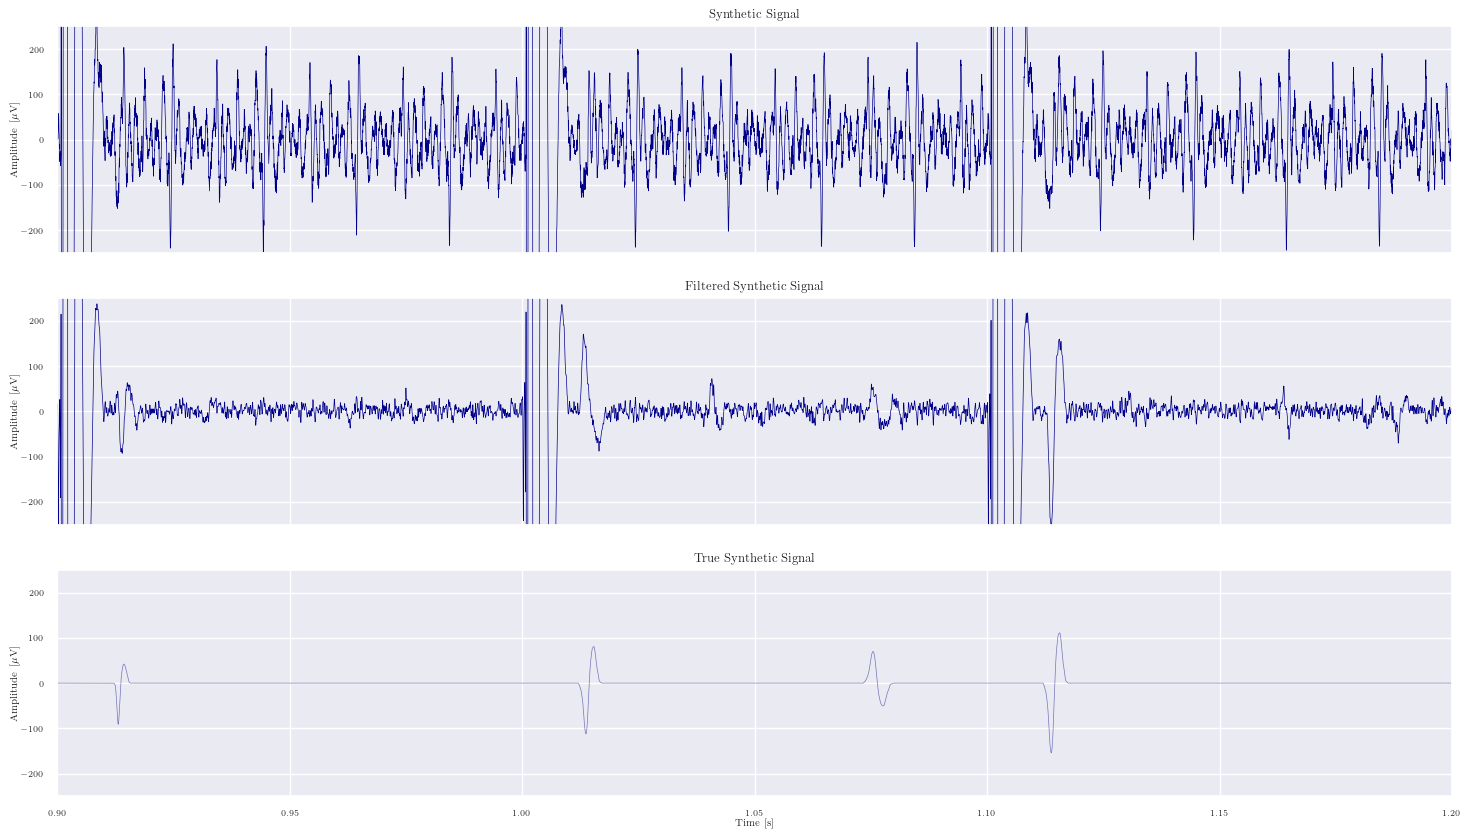

In [ ]:
with open("simulated_data_new.pkl", "rb") as f:
    config = pickle.load(f)
f.close()
x_axis = np.arange(len(config['obs_signal'])) / 30000
channel = 1

fig, ax = plt.subplots(3, 1, figsize = (18, 10), sharex=True)

ax[0].plot(x_axis, config['obs_signal'][:, channel], color = "darkblue", linewidth = 0.5)
ax[0].set_title("Synthetic Signal")

ax[1].plot(x_axis, config['filt_signal'][:, channel], color = "darkblue", linewidth = 0.5)
ax[1].set_title("Filtered Synthetic Signal")

ax[2].plot(x_axis, config['true_signal'][:, channel], color = "darkblue", alpha = 0.5, linewidth = 0.5)
ax[2].set_title("True Synthetic Signal")

ax[2].set_xlabel("Time [s]")
[a.set_xlim([0.9, 1.2]) for a in ax]           
[a.set_ylim([-250, 250]) for a in ax]
[a.set_ylabel(r"Amplitude [$\mu$V]") for a in ax]
plt.show()

savefig(fig, "preprocessing_results_synthetic", width=(21-3)/2.54, height=(21-3)/2.54*0.6)


### Preprocessing on Real Data 

In [6]:
path = "../../data/raw/Ramp data/Eye 5/ramp_file7.ns5"
times, data = read_ns5_file(path)
filtered_data, _ = filter(data, threshold=0.4)

x_axis = np.arange(300300) / 30000

Original ACF : 0.4979223793280473
new acf :  0.04620897210415848
ratio : 0.09280356542021287


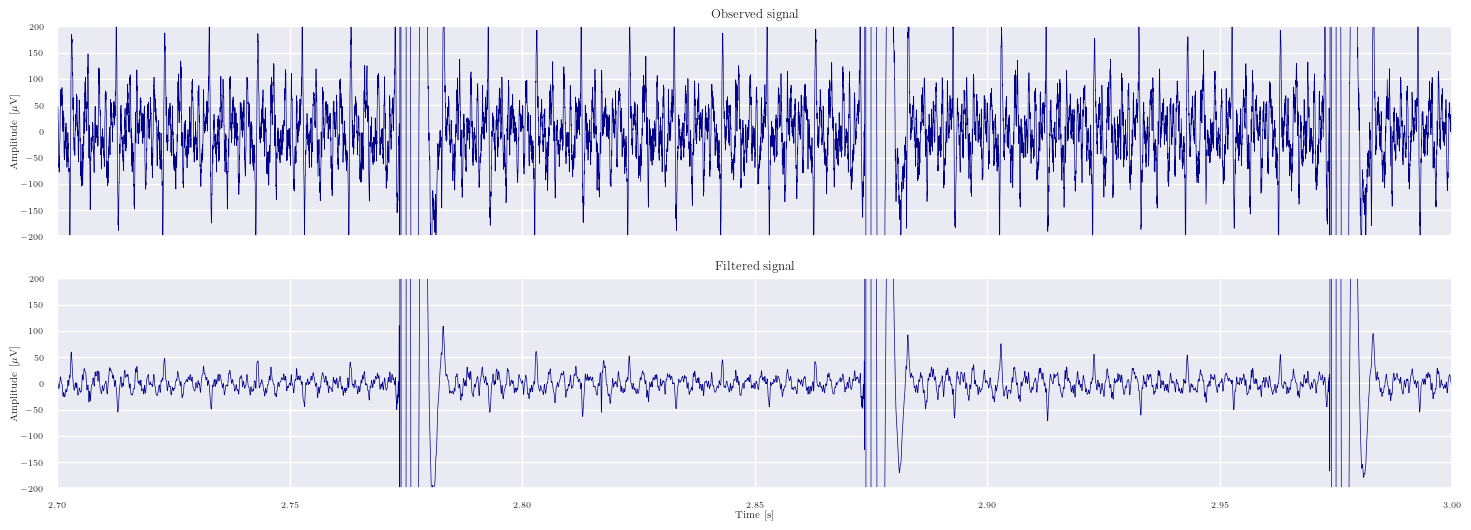

In [17]:
channel = 5 

fig, ax = plt.subplots(2, 1, figsize = (18, 6), sharex=True)

ax[0].plot(x_axis, data[:, channel], color = "darkblue", linewidth = 0.5)
ax[0].set_title("Observed signal")

ax[1].plot(x_axis, filtered_data[:, channel], color = "darkblue", linewidth = 0.5)
ax[1].set_title("Filtered signal")

ax[1].set_xlabel("Time [s]")
[a.set_xlim([2.7, 3]) for a in ax]           
[a.set_ylim([-200, 200]) for a in ax]
[a.set_ylabel(r"Amplitude [$\mu$V]") for a in ax]

plt.show()

savefig(fig, "real_data_ramp7_bad", width = 6.5, height = 4)